# View Sod Shock Tube Results

In [1]:
import h5py
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
sys.path.append('/Users/smil/Projects/cato/scripts/')
from load_datasets import load_1d_dataset
sns.set_context('talk')

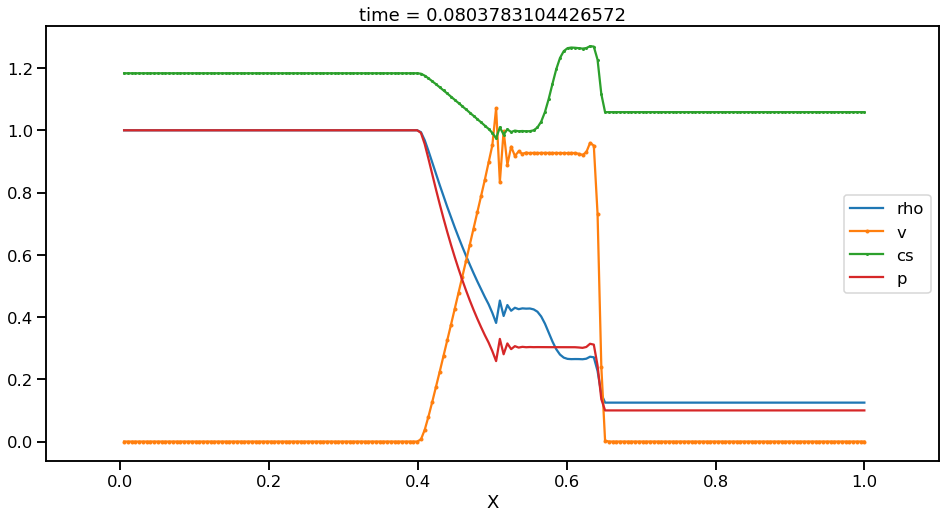

In [444]:
t=.2
import sod
import matplotlib.pyplot as plt
gamma = 1.4
npts = 400

positions, regions, values = sod.solve(left_state= (1,       1, 0), 
                                       right_state=(0.1, 0.125, 0.),
                                       geometry=(0., 1., 0.5), 
                                       t=t, gamma=gamma, npts=npts)

p = values['p']
rho = values['rho']
u = values['u']

# Energy and temperature
E = p/(gamma-1.) + 0.5*u**2
T = p/rho

import seaborn as sns
sns.set_context('talk')

# plt.figure(figsize=(18,10))
plt.figure(figsize=(16,8))

# plt.plot(values['x'], rho, linewidth=1.5, color='r', label='Exact')
# plt.ylabel('density')

ds = load_1d_dataset(folder='.', units='cgs')
gamma = 1.4
# ds['Sound Speed'] = np.sqrt(1.4*ds.pressure/ds.density)
ds['mach'] = ds.velocity/ds.sound_speed

ds.density.sel(time=t, method='nearest').plot(label='rho')
# plt.legend()
# # plt.xlim(.45,.55)
# plt.show()

# plt.figure(figsize=(18,10))
# plt.plot(values['x'], p, linewidth=1.5, color='r', label='Exact')
# plt.ylabel('pressure')

ds.velocity.sel(time=t, method='nearest').plot(marker='o',ms=3,label='v')
ds.sound_speed.sel(time=t, method='nearest').plot(marker='o',ms=2,label='cs')

ds.pressure.sel(time=t, method='nearest').plot(label='p')
# plt.legend()
# # plt.xlim(.45,.55)
# plt.show()

# plt.figure(figsize=(18,10))
# plt.plot(values['x'], u, linewidth=1.5, color='r', label='Exact')
# plt.ylabel('density')
# plt.title(f'Time: {t}')
plt.legend()
plt.xlabel('X')
plt.ylabel('')
# plt.xlim(.45,.55)
# plt.ylim(0,1.75)
plt.xlim(-.1,1.1)

plt.show()

In [3]:
import plotly.graph_objects as go
import pandas as pd

In [53]:
df.columns

Index(['dtheta_arc1_cell1', 'dtheta_arc1_cell2', 'ref_density',
       'ref_sound_speed', 'ref_u', 'ref_v', 'rho_arc1_cell_1',
       'rho_arc1_cell_2', 'u_arc1_cell_1', 'u_arc1_cell_2', 'v_arc1_cell_1',
       'v_arc1_cell_2', 'p_arc1_cell_1', 'p_arc1_cell_2', 'rho', 'u', 'v', 'p',
       'Unnamed: 18', 'ref_mach'],
      dtype='object')

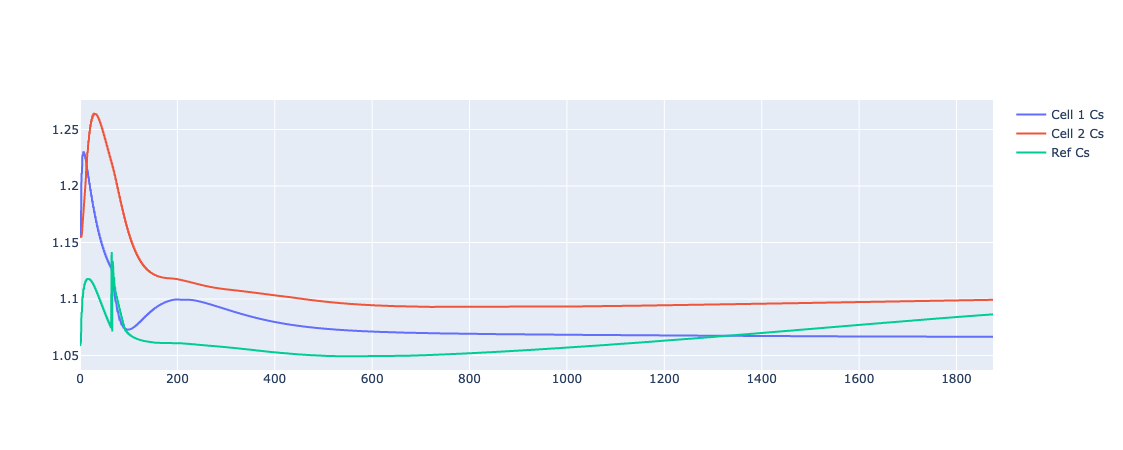

In [54]:

df = pd.read_csv('scratch.csv', sep=' ')
df['ref_mach'] = df['u']/np.sqrt((5/3)*df['p']/df['rho'])

df['cs_cell_1'] = np.sqrt((5/3)*df['p_arc1_cell_1']/df['rho_arc1_cell_1'])
df['cs_cell_2'] = np.sqrt((5/3)*df['p_arc1_cell_2']/df['rho_arc1_cell_2'])


# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(y=df['cs_cell_1'], name='Cell 1 Cs'))
fig.add_trace(go.Scatter(y=df['cs_cell_2'], name='Cell 2 Cs'))
fig.add_trace(go.Scatter(y=df['ref_sound_speed'], name='Ref Cs'))



# fig.add_trace(go.Scatter(y=df['ref_density'], name='Ref density'))
# fig.add_trace(go.Scatter(y=df['rho'], name='E0 density'))
# fig.add_trace(go.Scatter(y=df['rho_arc1_cell_1'], name='Cell 1 density'))
# fig.add_trace(go.Scatter(y=df['rho_arc1_cell_2'], name='Cell 2 density'))
fig.show()

# fig = go.Figure()
# fig.add_trace(go.Scatter(y=df['ref_u'], name='Ref u'))
# fig.add_trace(go.Scatter(y=df['ref_sound_speed'], name='Ref cs'))

# fig.add_trace(go.Scatter(y=df['ref_mach'], name='Ref Mach'))
# fig.add_trace(go.Scatter(y=df['u'], name='U'))
# fig.add_trace(go.Scatter(y=df['u_arc1_cell_1'], name='Cell 1 u'))
# fig.add_trace(go.Scatter(y=df['u_arc1_cell_2'], name='Cell 2 u'))
# fig.show()

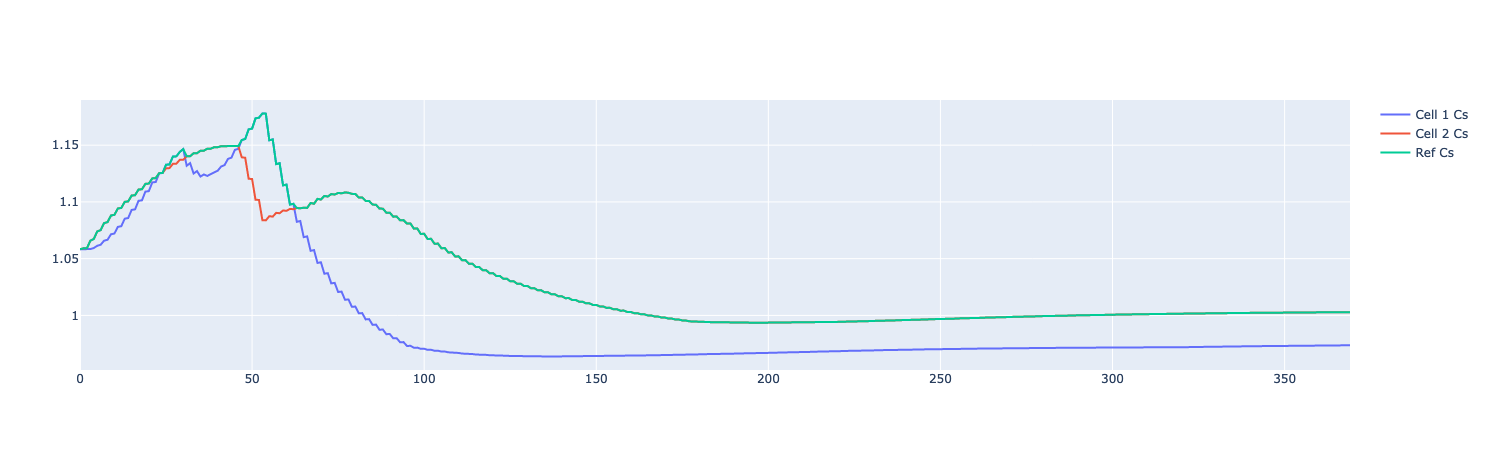

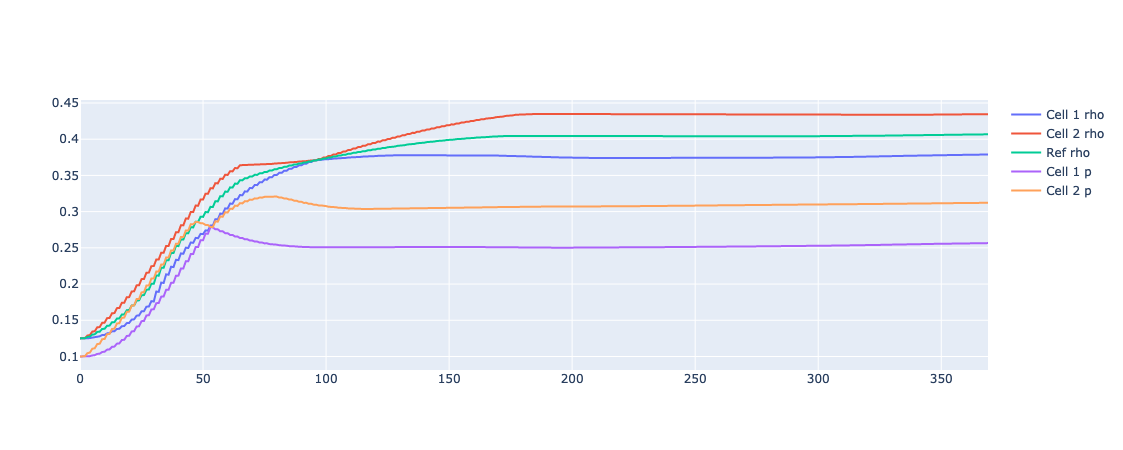

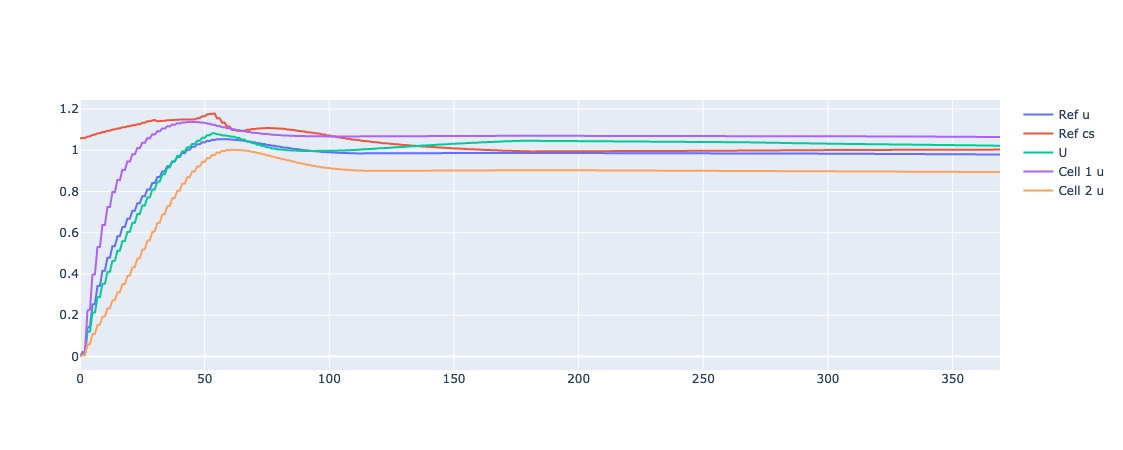

In [108]:

df = pd.read_csv('scratch.csv', sep=' ')

gamma = 1.4
df['ref_mach'] = df['u']/np.sqrt(gamma*df['p']/df['rho'])

df['cs_cell_1'] = np.sqrt(gamma*df['p_arc1_cell_1']/df['rho_arc1_cell_1'])
df['cs_cell_2'] = np.sqrt(gamma*df['p_arc1_cell_2']/df['rho_arc1_cell_2'])
# df['cs_ave'] = (df['cs_cell_1']+df['cs_cell_2'])/2.0
df['cs_ref'] = df['ref_sound_speed']

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(y=df['cs_cell_1'], name='Cell 1 Cs'))
fig.add_trace(go.Scatter(y=df['cs_cell_2'], name='Cell 2 Cs'))
# fig.add_trace(go.Scatter(y=df['cs_ave'], name='Ave Cs'))
fig.add_trace(go.Scatter(y=df['cs_ref'], name='Ref Cs'))
fig.show()


fig = go.Figure()
fig.add_trace(go.Scatter(y=df['rho_arc1_cell_1'], name='Cell 1 rho'))
fig.add_trace(go.Scatter(y=df['rho_arc1_cell_2'], name='Cell 2 rho'))
fig.add_trace(go.Scatter(y=df['ref_density'], name='Ref rho'))
# fig.show()

# fig = go.Figure()
fig.add_trace(go.Scatter(y=df['p_arc1_cell_1'], name='Cell 1 p'))
fig.add_trace(go.Scatter(y=df['p_arc1_cell_2'], name='Cell 2 p'))
# fig.add_trace(go.Scatter(y=df['ref_density'], name='Ref rho'))
fig.show()

# fig.add_trace(go.Scatter(y=df['ref_density'], name='Ref density'))
# fig.add_trace(go.Scatter(y=df['rho'], name='E0 density'))
# fig.add_trace(go.Scatter(y=df['rho_arc1_cell_1'], name='Cell 1 density'))
# fig.add_trace(go.Scatter(y=df['rho_arc1_cell_2'], name='Cell 2 density'))


fig = go.Figure()
fig.add_trace(go.Scatter(y=df['ref_u'], name='Ref u'))
fig.add_trace(go.Scatter(y=df['ref_sound_speed'], name='Ref cs'))
fig.add_trace(go.Scatter(y=df['u'], name='U'))
fig.add_trace(go.Scatter(y=df['u_arc1_cell_1'], name='Cell 1 u'))
fig.add_trace(go.Scatter(y=df['u_arc1_cell_2'], name='Cell 2 u'))
fig.show()

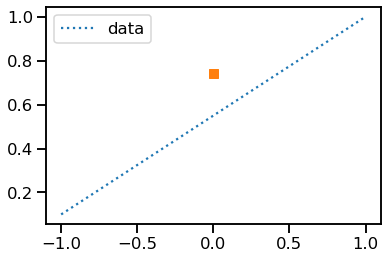

In [94]:
from scipy.interpolate import Rbf
# x, y, z, d = np.random.rand(4, 50)
x = [-1,1]
y = [0,0]
z = [0,0]
d = [.1,1]
rbfi = Rbf(x, y, z, d)  # radial basis function interpolator instance
xi = yi = zi = np.linspace(-1, 1, 10)
di = rbfi(xi, yi, zi)   # interpolated values
# plt.plot(xi, di, label='interp')
plt.figure()
plt.plot(x,d, ':', label='data')


d0 = rbfi(.5, 0, 0)
plt.plot(0,d0, 's')
d0
plt.legend()
plt.show()

In [435]:
columns = ['iteration', 'time', 'i', 'j', 'origin_x' ,'origin_y','p_prime_x','p_prime_y','radius', 'ref_density', 'ref_u', 'ref_v', 'ref_cs']

#corner
numpy_data = np.loadtxt('debug_corner_cones.csv', skiprows=1)
corner_df = pd.DataFrame(data=numpy_data, columns=columns)
corner_df = corner_df.astype({'iteration':'int32', 'i': 'int32', 'j': 'int32'})
# corner_df

#left/right midpoint
numpy_data = np.loadtxt('debug_lr_midpoint_cones.csv', skiprows=1)
lr_mid_df = pd.DataFrame(data=numpy_data, columns=columns)
lr_mid_df = lr_mid_df.astype({'iteration':'int32', 'i': 'int32', 'j': 'int32'})
# lf_mid_df

#down/up midpoint
numpy_data = np.loadtxt('debug_du_midpoint_cones.csv', skiprows=1)
du_mid_df = pd.DataFrame(data=numpy_data, columns=columns)
du_mid_df = du_mid_df.astype({'iteration':'int32', 'i': 'int32', 'j': 'int32'})
# du_mid_df

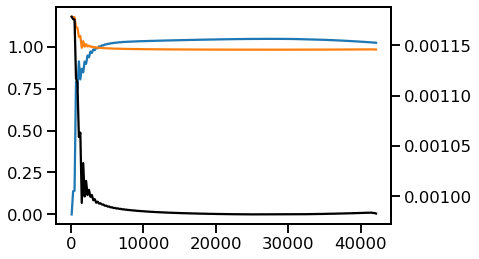

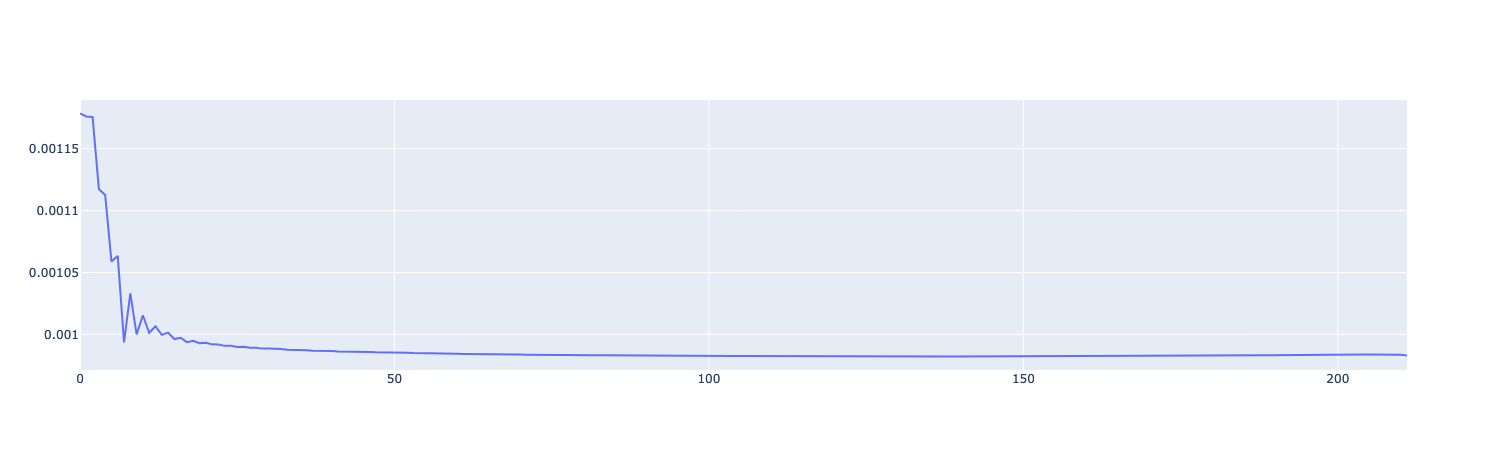

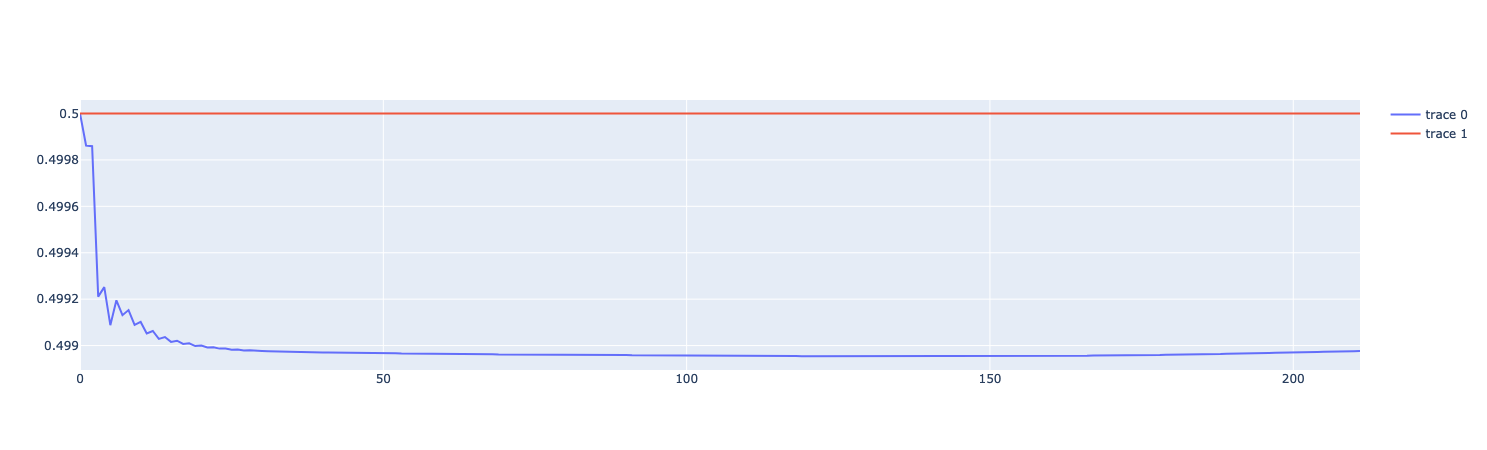

In [306]:
# du_mid_df[du_mid_df['i'] == 100]
# du_mid_df[du_mid_df['i'] == 100 & (du_mid_df['j'] == 1)]

fig, ax = plt.subplots()
ax2 = ax.twinx()
du_mid_df[(du_mid_df['i'] == 100) & (du_mid_df['j'] == 1)]['ref_u'].plot(ax=ax)
du_mid_df[(du_mid_df['i'] == 100) & (du_mid_df['j'] == 1)]['ref_cs'].plot(ax=ax)
du_mid_df[(du_mid_df['i'] == 100) & (du_mid_df['j'] == 1)]['radius'].plot(ax=ax2, color='k')
plt.show()


fig = go.Figure()
y = du_mid_df[(du_mid_df['i'] == 100) & (du_mid_df['j'] == 1)]['radius']
fig.add_trace(go.Scatter(y=y))
fig.show()


x = du_mid_df[(du_mid_df['i'] == 100) & (du_mid_df['j'] == 1)]['origin_x']
px = du_mid_df[(du_mid_df['i'] == 100) & (du_mid_df['j'] == 1)]['p_prime_x']

fig = go.Figure()
fig.add_trace(go.Scatter(y=px))
fig.add_trace(go.Scatter(y=x))
fig.show()


# du_mid_df[(du_mid_df['i'] == 100) & (du_mid_df['j'] == 1)]['ref_density'].plot()
# du_mid_df[(du_mid_df['j'] == 1)]

In [291]:
i=100
j=1
du_mid_df[(du_mid_df['i'] == i) & (du_mid_df['j'] == j)  & (du_mid_df['iteration'] == 0)]

iteration  time    i  j  origin_x  origin_y  p_prime_x  p_prime_y  \
99           0   0.0  100  1       0.5       0.0   0.500000        0.0   
298          0   0.0  100  1       0.5       0.0   0.499999        0.0   

       radius  ref_density     ref_u  ref_v   ref_cs  
99   0.000012       0.5625  0.000000    0.0  1.17847  
298  0.000012       0.5625  0.138134    0.0  1.17605

In [410]:
du_mid_df.iteration.max()
# corner_df['p_prime_y'][0]

28

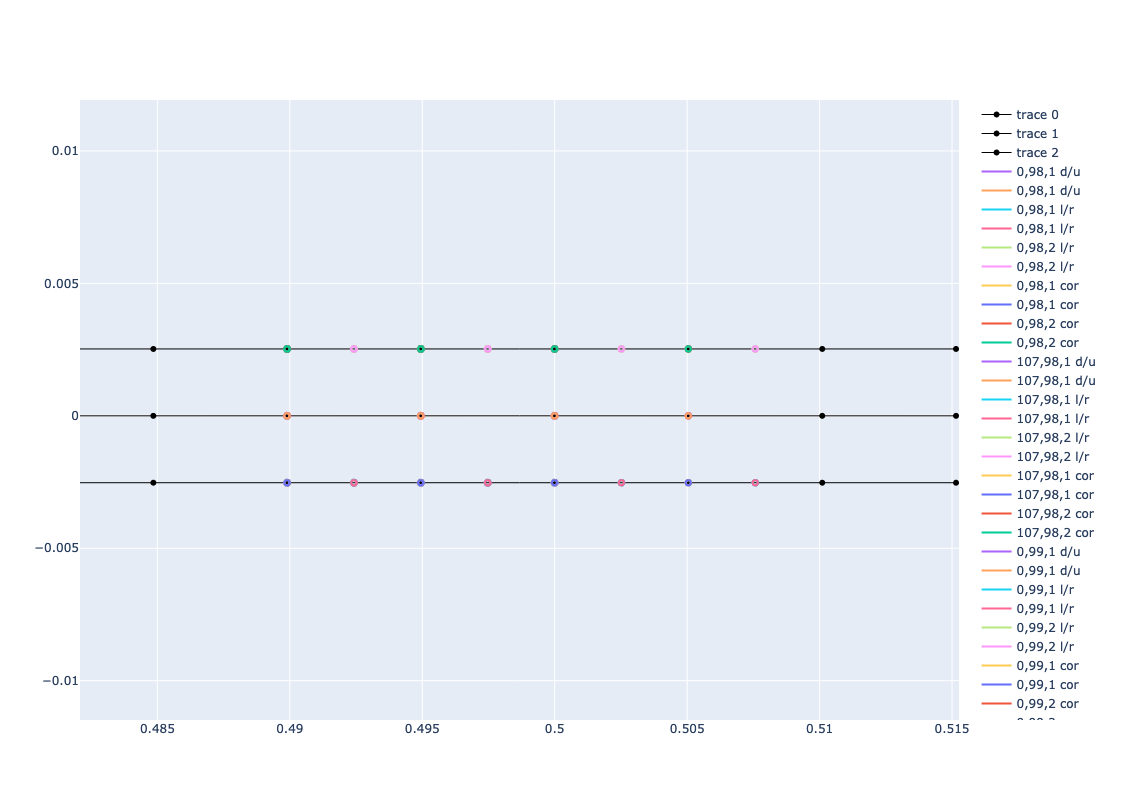

In [443]:
import plotly.graph_objects as go

fig = go.Figure()
# Set figure size
x = ds.x.data
y = np.zeros_like(x)
fig.add_trace(go.Scatter(x=x, y=y, mode='lines+markers',line=dict(color='black',width=1)))
skip = 2

dy = abs(corner_df['p_prime_y'][0])
fig.add_trace(go.Scatter(x=x, y=y-dy, mode='lines+markers',line=dict(color='black',width=1)))
fig.add_trace(go.Scatter(x=x, y=y+dy, mode='lines+markers',line=dict(color='black',width=1)))

theta = np.linspace(0, 2*np.pi, 25)

it_max = du_mid_df.iteration.max()
for i in range(98,102,1):
    for t in [0,1]:
        
        scale = 10
        
        # d/u
        j=1
        # it = du_mid_df.iteration.max() * t
        it = it_max * t
        df = du_mid_df[(du_mid_df['i'] == i) & (du_mid_df['j'] == j) & (du_mid_df['iteration'] == it)][::skip]
        radius = df['radius'] * scale
        x0 = df['p_prime_x']
        y0 = df['p_prime_y']
        for x,y,r in zip(x0, y0, radius):

            circle_x = r*np.cos(theta) + x
            circle_y = r*np.sin(theta) + y

            fig.add_trace(go.Scatter(x=circle_x, y=circle_y, name=f'{it},{i},{j} d/u'))

        # l/r
        for j in [1,2]:
            # it = lr_mid_df.iteration.max() * t
            it = it_max * t
            df = lr_mid_df[(lr_mid_df['i'] == i) & (lr_mid_df['j'] == j) & (lr_mid_df['iteration'] == it)][::skip]
            radius = df['radius'] * scale
            x0 = df['p_prime_x']
            y0 = df['p_prime_y']
            for x,y,r in zip(x0, y0, radius):

                circle_x = r*np.cos(theta) + x
                circle_y = r*np.sin(theta) + y

                fig.add_trace(go.Scatter(x=circle_x, y=circle_y, name=f'{it},{i},{j} l/r'))
            
            
        # corner
        for j in [1,2]:
            # it = corner_df.iteration.max() * t
            it = it_max * t
            df = corner_df[(corner_df['i'] == i) & (corner_df['j'] == j) & (corner_df['iteration'] == it)][::skip]
            radius = df['radius'] * scale
            x0 = df['p_prime_x']
            y0 = df['p_prime_y']
            for x,y,r in zip(x0, y0, radius):

                circle_x = r*np.cos(theta) + x
                circle_y = r*np.sin(theta) + y

                fig.add_trace(go.Scatter(x=circle_x, y=circle_y, name=f'{it},{i},{j} cor'))
    
fig.update_layout(height=800, yaxis=dict(scaleanchor="x", scaleratio=1))
fig.show()

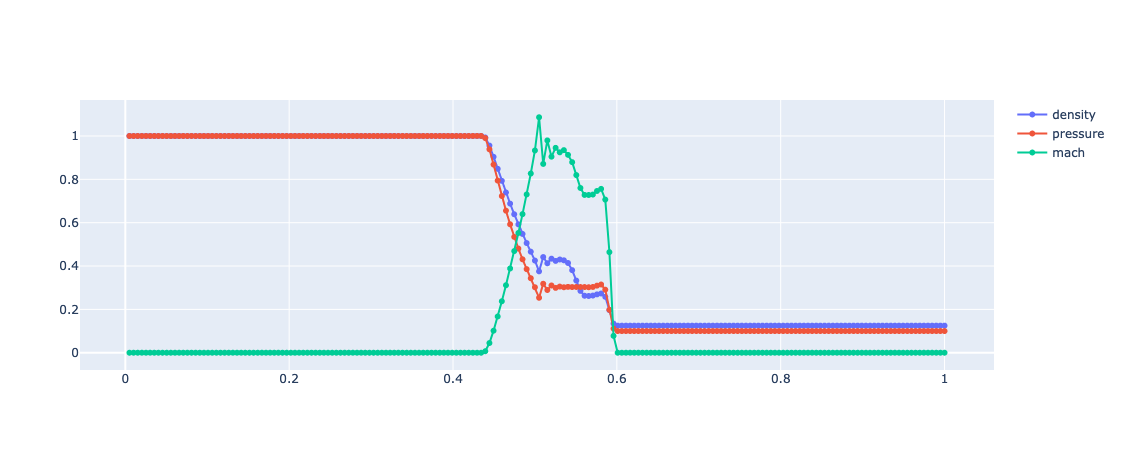

In [441]:
ds = load_1d_dataset(folder='.', units='cgs')
ds['mach'] = ds.velocity/ds.sound_speed

fig = go.Figure()
x = ds.x.data
t = -1
y = ds.density[t]
fig.add_trace(go.Scatter(x=x, y=y, name=f'density', mode='lines+markers',))
y = ds.pressure[t]
fig.add_trace(go.Scatter(x=x, y=y, name=f'pressure', mode='lines+markers',))
y = ds.mach[t]
fig.add_trace(go.Scatter(x=x, y=y, name=f'mach', mode='lines+markers',))
fig.show()

In [318]:
t=0
corner_df[(corner_df['i'] == i) & (corner_df['j'] == j) & (corner_df['iteration'] == t)][::2]

iteration  time    i  j  origin_x  origin_y  p_prime_x  p_prime_y  \
307          0   0.0  109  2  0.545455  0.002525   0.545455   0.002525   

       radius  ref_density  ref_u  ref_v  ref_cs  
307  0.001058        0.125    0.0    0.0  1.0583

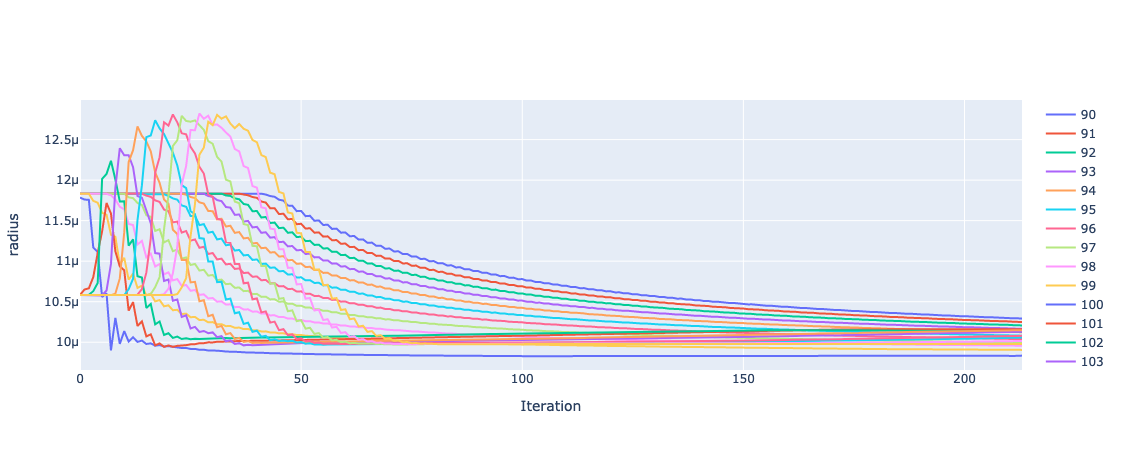

In [274]:




fig = go.Figure()

j=1
key = 'radius'
for i in range(90,110,1):
    df = du_mid_df[(du_mid_df['i'] == i) & (du_mid_df['j'] == j)]
    y = df[key]
    fig.add_trace(go.Scatter(y=y, name=str(i)))
    
fig.update_layout(xaxis_title="Iteration", yaxis_title=key)
fig.show()

In [348]:
du_mid_df[::2]

iteration    time    i  j  origin_x  origin_y  p_prime_x  p_prime_y  \
0              0  0.0000    1  1  0.000000       0.0   0.000000        0.0   
2              0  0.0000    3  1  0.010101       0.0   0.010101        0.0   
4              0  0.0000    5  1  0.020202       0.0   0.020202        0.0   
6              0  0.0000    7  1  0.030303       0.0   0.030303        0.0   
8              0  0.0000    9  1  0.040404       0.0   0.040404        0.0   
...          ...     ...  ... ..       ...       ...        ...        ...   
42178        105  0.1987  190  1  0.954545       0.0   0.954545        0.0   
42180        105  0.1987  192  1  0.964646       0.0   0.964646        0.0   
42182        105  0.1987  194  1  0.974747       0.0   0.974747        0.0   
42184        105  0.1987  196  1  0.984848       0.0   0.984848        0.0   
42186        105  0.1987  198  1  0.994949       0.0   0.994949        0.0   

         radius  ref_density  ref_u  ref_v   ref_cs  
0      0.001183        1.000    0.0    0.0  1.18322  
2      0.001183        1.000    0.0    0.0  1.18322  
4      0.001183        1.000    0.0    0.0  1.18322  
6      0.001183        1.000    0.0    0.0  1.18322  
8      0.001183        1.000    0.0    0.0  1.18322  
...         ...          ...    ...    ...      ...  
42178  0.001058        0.125    0.0    0.0  1.05830  
42180  0.001058        0.125    0.0    0.0  1.05830  
42182  0.001058        0.125    0.0    0.0  1.05830  
42184  0.001058        0.125    0.0    0.0  1.05830  
42186  0.001058        0.125    0.0    0.0  1.05830  

[21094 rows x 13 columns]

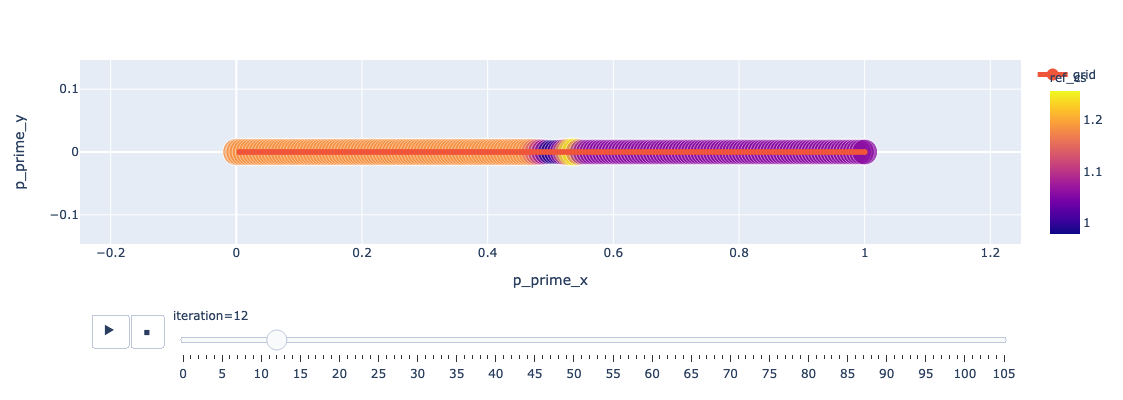

In [382]:
import plotly.express as px

df = du_mid_df
fig = px.scatter(df, x="p_prime_x", y="p_prime_y", color="ref_cs", opacity=0.5,
                 size='ref_cs', animation_frame="iteration", hover_data=["i", "j"])
x = ds.x.data
y = np.zeros_like(x)
fig.add_trace(go.Scatter(x=x, y=y, name=f'grid', mode='lines+markers'))

fig.update_xaxes(range=[.4,.6])
fig.update_yaxes(range=[-.01,.01])
fig.update_layout(height=400, yaxis=dict(scaleanchor="x", scaleratio=1))
fig.show()

In [439]:
np.log(2)

0.6931471805599453